# Z-score Method For Removing Outliers 

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Creating a dataset
df=pd.DataFrame({'Age':[20,21,22,23,24,25,26,27,28,29,30,50]})

In [5]:
df

,Age
0,20
1,21
2,22
3,23
4,24
5,25
6,26
7,27
8,28
9,29


<Axes: xlabel='Age', ylabel='Count'>

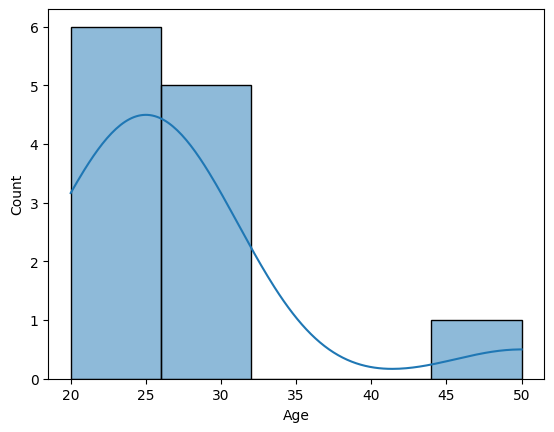

In [ ]:
# to visualize outliers and missing values
sns.histplot(df['Age'],bins=5,kde=True)

<Axes: ylabel='Age'>

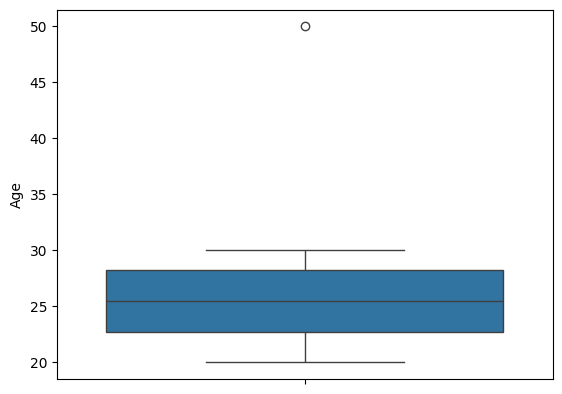

In [11]:
# to visualize outliars and missing values
sns.boxplot(df["Age"])

In [14]:
# calculate mean and standard deviation
mean=np.mean(df['Age'])
std=np.std(df['Age'])

# Calculating z-score
df['Z-score']=(df["Age"]-mean)/std
df
 

,Age,Z-score
0,20,-0.938954
1,21,-0.806396
2,22,-0.673838
3,23,-0.541280
4,24,-0.408721
5,25,-0.276163
6,26,-0.143605
7,27,-0.011047
8,28,0.121512
9,29,0.254070


In [19]:
# print the data
print("------------------------------------------")
print(f"Here is the data with outliers\n {df}")
print("-----------------------------------------")

------------------------------------------
Here is the data with outliers
     Age   Z-score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628
11   50  3.037793
-----------------------------------------


If the value of z score is greater than 3 it will be an outlier and less than -3 it is also an outlier

In [27]:
# print outliers
print(f" here are the outliers based on the z-score threshold, 3: \n {df[df['Z-score']>3]}")

 here are the outliers based on the z-score threshold, 3: 
     Age   Z-score
11   50  3.037793


In [28]:
# Remove outliers
df=df[df["Z-score"]<=3]

# print the data without outliers
print(f"here is the data without outliers:\n {df}")

here is the data without outliers:
     Age   Z-score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628


# Using Loop to Remove Outliers

In [31]:
import numpy as np
from scipy import stats

In [32]:
# Making smaple data
data=[2.5,2.7,2.8,3.0,3.2,3.4,3.6,3.8,4.0,110.0]



<Axes: ylabel='Count'>

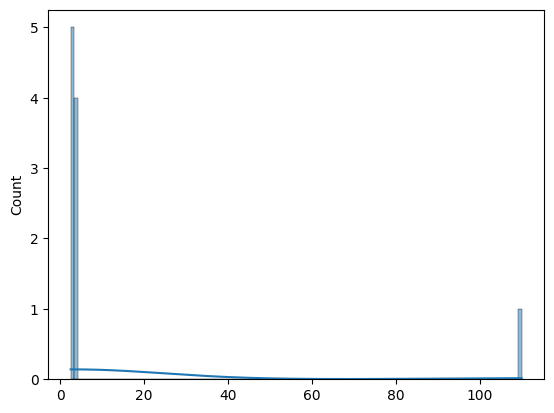

In [35]:
sns.histplot(data, kde=True)

<Axes: >

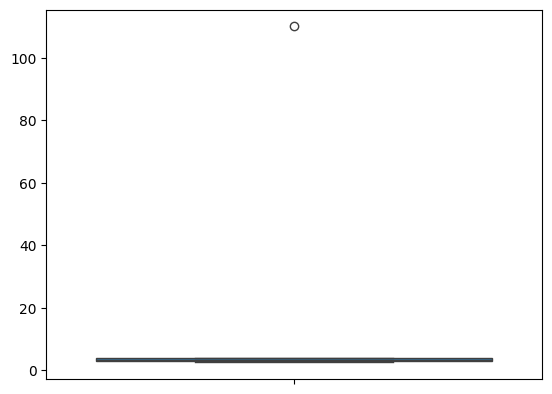

In [36]:
sns.boxplot(data)

In [42]:
# calculte z-score
z_score=np.abs(stats.zscore(data))

# set a threshold for identifying outliers
threshold=2.5 # here we are settig 2.5 threshold instead of 3
outliers=np.where(z_score>threshold)[0]

# print the data
print("----------------------------------")
print("Data:",data)
print("----------------------------------")

print("Indices of Outliers:", outliers)
print("Outliers",[data[i] for i in outliers])

# Remove outliers
data=[data[i] for i in range(len(data)) if i not in outliers]
print("------------------------------------")
print("Data without outliers:",data)

----------------------------------
Data: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
----------------------------------
Indices of Outliers: [9]
Outliers [110.0]
------------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


# Inter Quartile Range Method to Remove Outliers

In [43]:
import pandas as pd
import numpy as np

data=pd.DataFrame({"Age":[20,21,22,23,24,25,26,27,28,29,30,50]})

# Calculate Firsta nd Third Quartile 
Q1=np.percentile(data["Age"],25, interpolation='midpoint')
Q3=np.percentile(data["Age"],75, interpolation='midpoint')

# Calculate IQR
IQR=Q3-Q1

# Calculate Lower and upper bound
lower_bound= Q1-(IQR*1.5)
Upper_bound= Q3+(IQR*1.5)

# print the data
print("------------------------------------------")
print(f"Here is the data with outliers\n {data}")
print("-----------------------------------------")

# print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {data[(data["Age"]< lower_bound)]}")
print("-------------------------------------")

# Remove the outliers
data=data[(data["Age"]>= lower_bound) & (data["Age"]<=Upper_bound)]

# print data without outliers
print(f"here is the data without outliers: \n {data}")


------------------------------------------
Here is the data with outliers
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   50
-----------------------------------------
Here are the outliers based on the IQR threshold:
 Empty DataFrame
Columns: [Age]
Index: []
-------------------------------------
here is the data without outliers: 
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30


# K-Means Algorithm To Remove Outliers

In [47]:
from sklearn.cluster import KMeans
# it deals when the data is present in clusters

In [48]:
# create datset
data=[[2,2],[3,3],[3,4],[30,30],[31,31],[32,32]]

# create k-means model with two clusters (normal and outliers)

kmeans=KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# Predict cluster labels
labels=kmeans.predict(data)

# identify outliers based on cluster labels
outliers=[data[i] for i, label in enumerate(labels) if label==1]

# print data
print("Data",data)
print("outliers",outliers)

# remove outliers
data=[data[i] for i, label in enumerate(labels) if label==0]
print("Data without outliers: ",data)


c:\Users\USER\miniconda3\envs\python_eda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\USER\miniconda3\envs\python_eda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\USER\miniconda3\envs\python_eda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\miniconda3\envs\python_eda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\USER\miniconda3\envs\python_eda\Lib\subpr

Data [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
outliers [[2, 2], [3, 3], [3, 4]]
Data without outliers:  [[30, 30], [31, 31], [32, 32]]
